# Assignment- Linear Regression 

Problem Statement:

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

Essentially, the company wants —

To identify the variables affecting the pricing of cars in the American market

To create a linear model that quantitatively relates car prices with variables of design of the cars.

To know the accuracy of the model, i.e. how well these variables can predict car prices.

### Importing and Understanding Data

In [330]:
import pandas as pd
import numpy as np

In [331]:
# Importing CarPrice_Assignment.csv
car = pd.read_csv('C:/Users/Admin/Downloads/CarPrice_Assignment.csv')

In [332]:
# Looking at the first five rows
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [333]:
# What type of values are stored in the columns?
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

### Data Preparation

In [334]:
car['company'] = car.CarName.str.split('\s+').str[0]
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [335]:
car=car.drop('CarName', axis=1)

In [336]:
# Converting Gas to 1 and Diesel to 0
car['fueltype'] =car['fueltype'].map({'gas': 1, 'diesel': 0})
car['aspiration'] =car['aspiration'].map({'std': 1, 'turbo': 0})
car['doornumber'] =car['doornumber'].map({'four': 4, 'two': 2})
car['enginelocation'] =car['enginelocation'].map({'front': 1, 'rear': 0})

In [337]:
car.carbody.value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [338]:
# Creating a dummy variable for 'furnishingstatus'
car_body = pd.get_dummies(car['carbody'])

In [339]:
# The result has created three variables that are not needed.
car_body.head()

,convertible,hardtop,hatchback,sedan,wagon
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0


In [340]:
# we don't need 3 columns.
# we can use drop_first = True to drop the first column from status df.
car_body = pd.get_dummies(car['carbody'],drop_first=True)

In [341]:
#Adding the results to the master dataframe
car = pd.concat([car,car_body],axis=1)
car.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,horsepower,peakrpm,citympg,highwaympg,price,company,hardtop,hatchback,sedan,wagon
0,1,3,1,1,2,convertible,rwd,1,88.6,168.8,...,111,5000,21,27,13495.0,alfa-romero,0,0,0,0
1,2,3,1,1,2,convertible,rwd,1,88.6,168.8,...,111,5000,21,27,16500.0,alfa-romero,0,0,0,0
2,3,1,1,1,2,hatchback,rwd,1,94.5,171.2,...,154,5000,19,26,16500.0,alfa-romero,0,1,0,0
3,4,2,1,1,4,sedan,fwd,1,99.8,176.6,...,102,5500,24,30,13950.0,audi,0,0,1,0
4,5,2,1,1,4,sedan,4wd,1,99.4,176.6,...,115,5500,18,22,17450.0,audi,0,0,1,0


In [342]:
car=car.drop('carbody', axis=1)

In [343]:
# Creating a dummy variable for 'furnishingstatus'
drive_wheel = pd.get_dummies(car['drivewheel'])

In [344]:
# The result has created three variables that are not needed.
drive_wheel.head()

,4wd,fwd,rwd
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,1,0,0


In [345]:
# we don't need 3 columns.
# we can use drop_first = True to drop the first column from status df.
drive_wheel = pd.get_dummies(car['drivewheel'],drop_first=True)
#Adding the results to the master dataframe
car = pd.concat([car,drive_wheel],axis=1)
car.head()

,car_ID,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,citympg,highwaympg,price,company,hardtop,hatchback,sedan,wagon,fwd,rwd
0,1,3,1,1,2,rwd,1,88.6,168.8,64.1,...,21,27,13495.0,alfa-romero,0,0,0,0,0,1
1,2,3,1,1,2,rwd,1,88.6,168.8,64.1,...,21,27,16500.0,alfa-romero,0,0,0,0,0,1
2,3,1,1,1,2,rwd,1,94.5,171.2,65.5,...,19,26,16500.0,alfa-romero,0,1,0,0,0,1
3,4,2,1,1,4,fwd,1,99.8,176.6,66.2,...,24,30,13950.0,audi,0,0,1,0,1,0
4,5,2,1,1,4,4wd,1,99.4,176.6,66.4,...,18,22,17450.0,audi,0,0,1,0,0,0


In [346]:
car=car.drop('drivewheel', axis=1)

In [347]:
# Creating a dummy variable for 'furnishingstatus'
engine_type = pd.get_dummies(car['enginetype'])
# The result has created three variables that are not needed.
engine_type.head()

,dohc,dohcv,l,ohc,ohcf,ohcv,rotor
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0


In [348]:
# we don't need 3 columns.
# we can use drop_first = True to drop the first column from status df.
engine_type= pd.get_dummies(car['enginetype'],drop_first=True)
#Adding the results to the master dataframe
car = pd.concat([car,engine_type],axis=1)
car.head()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor
0,1,3,1,1,2,1,88.6,168.8,64.1,48.8,...,0,0,0,1,0,0,0,0,0,0
1,2,3,1,1,2,1,88.6,168.8,64.1,48.8,...,0,0,0,1,0,0,0,0,0,0
2,3,1,1,1,2,1,94.5,171.2,65.5,52.4,...,0,0,0,1,0,0,0,0,1,0
3,4,2,1,1,4,1,99.8,176.6,66.2,54.3,...,1,0,1,0,0,0,1,0,0,0
4,5,2,1,1,4,1,99.4,176.6,66.4,54.3,...,1,0,0,0,0,0,1,0,0,0


In [349]:
car=car.drop('enginetype', axis=1)

In [350]:
# Creating a dummy variable for 'furnishingstatus'
cylinder_number = pd.get_dummies(car['cylindernumber'])
# The result has created three variables that are not needed.
cylinder_number.head()

,eight,five,four,six,three,twelve,two
0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0


In [351]:
# we don't need 3 columns.
# we can use drop_first = True to drop the first column from status df.
cylinder_number= pd.get_dummies(car['cylindernumber'],drop_first=True)
#Adding the results to the master dataframe
car = pd.concat([car,cylinder_number],axis=1)
car.head()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
0,1,3,1,1,2,1,88.6,168.8,64.1,48.8,...,0,0,0,0,0,1,0,0,0,0
1,2,3,1,1,2,1,88.6,168.8,64.1,48.8,...,0,0,0,0,0,1,0,0,0,0
2,3,1,1,1,2,1,94.5,171.2,65.5,52.4,...,0,0,1,0,0,0,1,0,0,0
3,4,2,1,1,4,1,99.8,176.6,66.2,54.3,...,1,0,0,0,0,1,0,0,0,0
4,5,2,1,1,4,1,99.4,176.6,66.4,54.3,...,1,0,0,0,1,0,0,0,0,0


In [352]:
car=car.drop('cylindernumber', axis=1)

In [353]:
# Creating a dummy variable for 'furnishingstatus'
fuel_system = pd.get_dummies(car['fuelsystem'])
# The result has created three variables that are not needed.
fuel_system.head()

,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0


In [354]:
# we don't need 3 columns.
# we can use drop_first = True to drop the first column from status df.
fuel_system= pd.get_dummies(car['fuelsystem'],drop_first=True)
#Adding the results to the master dataframe
car = pd.concat([car,fuel_system],axis=1)
car.head()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,1,3,1,1,2,1,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,1,0,0
1,2,3,1,1,2,1,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,1,0,0
2,3,1,1,1,2,1,94.5,171.2,65.5,52.4,...,0,0,0,0,0,0,0,1,0,0
3,4,2,1,1,4,1,99.8,176.6,66.2,54.3,...,0,0,0,0,0,0,0,1,0,0
4,5,2,1,1,4,1,99.4,176.6,66.4,54.3,...,0,0,0,0,0,0,0,1,0,0


In [355]:
car=car.drop('fuelsystem', axis=1)

In [356]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 46 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
fueltype            205 non-null int64
aspiration          205 non-null int64
doornumber          205 non-null int64
enginelocation      205 non-null int64
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginesize          205 non-null int64
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg          205 non-null int64
price               205 non-null float64
company             205 non-null object
hardtop             205 non-null uint8
hatchback           

In [357]:
car.company.value_counts()

toyota         31
nissan         17
mazda          15
mitsubishi     13
honda          13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         4
isuzu           4
chevrolet       3
jaguar          3
alfa-romero     3
renault         2
maxda           2
vw              2
porcshce        1
vokswagen       1
toyouta         1
Nissan          1
mercury         1
Name: company, dtype: int64

In [358]:
car['company'] = car['company'].replace({'maxda':'mazda'}, regex = True)
car['company'] = car['company'].replace({'vw':'volkswagen'}, regex = True)
car['company'] = car['company'].replace({'porcshce':'porsche'}, regex = True)
car['company'] = car['company'].replace({'vokswagen':'volkswagen'}, regex = True)
car['company'] = car['company'].replace({'toyouta':'toyota'}, regex = True)
car['company'] = car['company'].replace({'Nissan':'nissan'}, regex = True)

In [359]:
car.company.value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
subaru         12
volkswagen     12
peugeot        11
volvo          11
dodge           9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
alfa-romero     3
chevrolet       3
renault         2
mercury         1
Name: company, dtype: int64

In [360]:
# Creating a dummy variable for 'furnishingstatus'
company_name = pd.get_dummies(car['company'])
# The result has created three variables that are not needed.
company_name.head()

,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [361]:
# we don't need 3 columns.
# we can use drop_first = True to drop the first column from status df.
company_name= pd.get_dummies(car['company'],drop_first=True)
#Adding the results to the master dataframe
car = pd.concat([car,company_name],axis=1)
car.head()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,1,3,1,1,2,1,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,0,0,0
1,2,3,1,1,2,1,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,0,0,0
2,3,1,1,1,2,1,94.5,171.2,65.5,52.4,...,0,0,0,0,0,0,0,0,0,0
3,4,2,1,1,4,1,99.8,176.6,66.2,54.3,...,0,0,0,0,0,0,0,0,0,0
4,5,2,1,1,4,1,99.4,176.6,66.4,54.3,...,0,0,0,0,0,0,0,0,0,0


In [362]:
car=car.drop('company', axis=1)

In [363]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 66 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
fueltype            205 non-null int64
aspiration          205 non-null int64
doornumber          205 non-null int64
enginelocation      205 non-null int64
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginesize          205 non-null int64
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg          205 non-null int64
price               205 non-null float64
hardtop             205 non-null uint8
hatchback           205 non-null uint8
sedan               2

## Rescaling the Features

It is extremely important to rescale the variables so that they have a comparable scale. There are twocoon ways of rescaling

Normalisation (min-max scaling) and
standardisation (mean-o, sigma-1) Let's try normalisation

In [364]:
#defining a normalisation function 
def normalize (x): 
    return ( (x-np.mean(x))/ (max(x) - min(x)))
                                                                               
# applying normalize ( ) to all columns 
car = car.apply(normalize) 

# Splitting Data into Training and Testing Sets

In [365]:
car.columns

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'hardtop',
       'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'dohcv', 'l', 'ohc',
       'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six', 'three', 'twelve',
       'two', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi', 'audi',
       'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar',
       'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot', 'plymouth',
       'porsche', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen',
       'volvo'],
      dtype='object')

In [366]:
# Putting feature variable to X
X = car[['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'hardtop',
       'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'dohcv', 'l', 'ohc',
       'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six', 'three', 'twelve',
       'two', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi', 'audi',
       'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar',
       'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot', 'plymouth',
       'porsche', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen',
       'volvo']]

# Putting response variable to y
y = car['price']

In [367]:
#random_state is the seed used by the random number generator, it can be any integer.
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

# Building a linear model

In [368]:
import statsmodels.api as sm          # Importing statsmodels
X_train = sm.add_constant(X_train)    # Adding a constant column to our dataframe
# create a first fitted model
lm_1 = sm.OLS(y_train,X_train).fit()

In [369]:
#Let's see the summary of our first linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     57.58
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           3.34e-49
Time:                        23:23:22   Log-Likelihood:                 297.33
No. Observations:                 143   AIC:                            -476.7
Df Residuals:                      84   BIC:                            -301.9
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
car_ID               0.5061      0.326  

### Checking VIF

In [370]:
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [371]:
# Calculating Vif value
vif_cal(input_data=car, dependent_col="price")

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
26,l,inf
2,fueltype,inf
5,enginelocation,inf
61,subaru,inf
56,peugeot,inf
39,idi,inf
36,two,inf
34,three,inf
30,rotor,inf
28,ohcf,inf


### Dropping the Variable and Updating the Model

In [372]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('symboling', 1)

In [373]:
# Create a second fitted model
lm_2 = sm.OLS(y_train,X_train).fit()

In [374]:
#Let's see the summary of our second linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     59.28
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           4.31e-50
Time:                        23:23:27   Log-Likelihood:                 297.33
No. Observations:                 143   AIC:                            -478.7
Df Residuals:                      85   BIC:                            -306.8
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
car_ID               0.5090      0.322  

In [375]:
# Calculating Vif value
vif_cal(input_data=car.drop(["symboling"], axis=1), dependent_col="price")

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
25,l,inf
4,enginelocation,inf
60,subaru,inf
55,peugeot,inf
38,idi,inf
35,two,inf
33,three,inf
1,fueltype,inf
29,rotor,inf
27,ohcf,inf


In [376]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('fwd', 1)

In [377]:
# Create a third fitted model
lm_3 = sm.OLS(y_train,X_train).fit()

In [378]:
#Let's see the summary of our third linear model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     61.05
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           5.49e-51
Time:                        23:23:33   Log-Likelihood:                 297.32
No. Observations:                 143   AIC:                            -480.6
Df Residuals:                      86   BIC:                            -311.8
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
car_ID               0.5045      0.316  

In [379]:
# Calculating Vif value
vif_cal(input_data=car.drop(["symboling","fwd"], axis=1), dependent_col="price")

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
24,l,inf
4,enginelocation,inf
59,subaru,inf
54,peugeot,inf
37,idi,inf
34,two,inf
32,three,inf
1,fueltype,inf
28,rotor,inf
26,ohcf,inf


In [380]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('spdi', 1)
# Create a third fitted model
lm_4 = sm.OLS(y_train,X_train).fit()

In [381]:
#Let's see the summary of our third linear model
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     62.86
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           6.97e-52
Time:                        23:23:41   Log-Likelihood:                 297.30
No. Observations:                 143   AIC:                            -482.6
Df Residuals:                      87   BIC:                            -316.7
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
car_ID               0.5136      0.310  

In [382]:
# Calculating Vif value
vif_cal(input_data=car.drop(["symboling","fwd","spdi"], axis=1), dependent_col="price")

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
24,l,inf
4,enginelocation,inf
58,subaru,inf
53,peugeot,inf
37,idi,inf
34,two,inf
32,three,inf
1,fueltype,inf
28,rotor,inf
26,ohcf,inf


In [383]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('ohc', 1)
# Create a third fitted model
lm_5 = sm.OLS(y_train,X_train).fit()

In [384]:
#Let's see the summary of our third linear model
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     64.74
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           8.70e-53
Time:                        23:23:43   Log-Likelihood:                 297.28
No. Observations:                 143   AIC:                            -484.6
Df Residuals:                      88   BIC:                            -321.6
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
car_ID               0.5099      0.307  

In [385]:
# Calculating Vif value
vif_cal(input_data=car.drop(["symboling","fwd","spdi","ohc"], axis=1), dependent_col="price")

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
24,l,inf
4,enginelocation,inf
57,subaru,inf
52,peugeot,inf
36,idi,inf
33,two,inf
31,three,inf
1,fueltype,inf
27,rotor,inf
25,ohcf,inf


In [386]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('porsche', 1)
# Create a third fitted model
lm_6 = sm.OLS(y_train,X_train).fit()

In [387]:
#Let's see the summary of our third linear model
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     66.65
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           1.09e-53
Time:                        23:23:46   Log-Likelihood:                 297.22
No. Observations:                 143   AIC:                            -486.4
Df Residuals:                      89   BIC:                            -326.5
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
car_ID               0.4350      0.127  

In [388]:
# Calculating Vif value
vif_cal(input_data=car.drop(["symboling","fwd","spdi","ohc","porsche"], axis=1), dependent_col="price")

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
31,three,inf
27,rotor,inf
25,ohcf,inf
56,subaru,inf
4,enginelocation,inf
52,peugeot,inf
36,idi,inf
33,two,inf
24,l,inf
1,fueltype,inf


In [389]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('mpfi', 1)
# Create a third fitted model
lm_7 = sm.OLS(y_train,X_train).fit()


In [390]:
#Let's see the summary of our third linear model
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     68.68
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           1.33e-54
Time:                        23:23:50   Log-Likelihood:                 297.20
No. Observations:                 143   AIC:                            -488.4
Df Residuals:                      90   BIC:                            -331.4
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
car_ID               0.4344      0.126  

In [391]:
# Calculating Vif value
vif_cal(input_data=car.drop(["symboling","fwd","spdi","ohc","porsche","mpfi"], axis=1), dependent_col="price")

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
55,subaru,inf
51,peugeot,inf
4,enginelocation,inf
36,idi,inf
33,two,inf
31,three,inf
1,fueltype,inf
27,rotor,inf
25,ohcf,inf
24,l,inf


In [392]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('citympg', 1)
# Create a third fitted model
lm_8 = sm.OLS(y_train,X_train).fit()

In [393]:
#Let's see the summary of our third linear model
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     70.70
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           1.67e-55
Time:                        23:23:53   Log-Likelihood:                 297.10
No. Observations:                 143   AIC:                            -490.2
Df Residuals:                      91   BIC:                            -336.1
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
car_ID               0.4330      0.125  

In [394]:
# Calculating Vif value
vif_cal(input_data=car.drop(["symboling","fwd","spdi","ohc","porsche","mpfi","citympg"], axis=1), dependent_col="price")

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
23,l,inf
54,subaru,inf
4,enginelocation,inf
50,peugeot,inf
35,idi,inf
32,two,inf
30,three,inf
1,fueltype,inf
26,rotor,inf
24,ohcf,inf


In [395]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('ohcv', 1)
# Create a third fitted model
lm_9 = sm.OLS(y_train,X_train).fit()


In [396]:
#Let's see the summary of our third linear model
print(lm_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     72.67
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           2.23e-56
Time:                        23:23:56   Log-Likelihood:                 296.88
No. Observations:                 143   AIC:                            -491.8
Df Residuals:                      92   BIC:                            -340.6
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
car_ID               0.4586      0.115  

In [397]:
# Calculating Vif value
vif_cal(input_data=car.drop(["symboling","fwd","spdi","ohc","porsche","mpfi","citympg","ohcv"], axis=1), dependent_col="price")

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
23,l,inf
53,subaru,inf
4,enginelocation,inf
49,peugeot,inf
34,idi,inf
31,two,inf
29,three,inf
1,fueltype,inf
25,rotor,inf
24,ohcf,inf


In [398]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('4bbl', 1)
# Create a third fitted model
lm_10 = sm.OLS(y_train,X_train).fit()

In [399]:
#Let's see the summary of our third linear model
print(lm_10.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     74.67
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           3.04e-57
Time:                        23:23:59   Log-Likelihood:                 296.61
No. Observations:                 143   AIC:                            -493.2
Df Residuals:                      93   BIC:                            -345.1
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
car_ID               0.4651      0.114  

In [400]:
# Calculating Vif value
vif_cal(input_data=car.drop(["symboling","fwd","spdi","ohc","porsche","mpfi","citympg","ohcv","4bbl"], axis=1), dependent_col="price")

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
23,l,inf
52,subaru,inf
4,enginelocation,inf
48,peugeot,inf
33,idi,inf
31,two,inf
29,three,inf
1,fueltype,inf
25,rotor,inf
24,ohcf,inf


In [401]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('ohcf', 1)
# Create a third fitted model
lm_11 = sm.OLS(y_train,X_train).fit()

In [402]:
#Let's see the summary of our third linear model
print(lm_11.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     74.67
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           3.04e-57
Time:                        23:24:01   Log-Likelihood:                 296.61
No. Observations:                 143   AIC:                            -493.2
Df Residuals:                      93   BIC:                            -345.1
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
car_ID               0.4651      0.114  

In [403]:
# Calculating Vif value
vif_cal(input_data=car.drop(["symboling","fwd","spdi","ohc","porsche","mpfi","citympg","ohcv","4bbl","ohcf"], axis=1), dependent_col="price")

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
47,peugeot,inf
32,idi,inf
30,two,inf
28,three,inf
1,fueltype,inf
24,rotor,inf
23,l,inf
13,compressionratio,204.080000
26,four,99.020000
0,car_ID,80.230000


In [404]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('audi', 1)
# Create a third fitted model
lm_12 = sm.OLS(y_train,X_train).fit()

In [405]:

#Let's see the summary of our third linear model
print(lm_12.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     75.88
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           6.85e-58
Time:                        23:24:03   Log-Likelihood:                 295.54
No. Observations:                 143   AIC:                            -493.1
Df Residuals:                      94   BIC:                            -347.9
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
car_ID               0.4096      0.104  

In [406]:
# Calculating Vif value
vif_cal(input_data=car.drop(["symboling","fwd","spdi","ohc","porsche","mpfi","citympg","ohcv","4bbl","ohcf","audi"], axis=1), dependent_col="price")

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
23,l,inf
46,peugeot,inf
32,idi,inf
30,two,inf
28,three,inf
1,fueltype,inf
24,rotor,inf
13,compressionratio,202.190000
26,four,85.620000
0,car_ID,70.090000


In [407]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('six', 1)
# Create a third fitted model
lm_13 = sm.OLS(y_train,X_train).fit()

In [408]:
print(lm_13.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     76.85
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           1.82e-58
Time:                        23:24:05   Log-Likelihood:                 294.23
No. Observations:                 143   AIC:                            -492.5
Df Residuals:                      95   BIC:                            -350.2
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
car_ID               0.3803      0.102  

In [409]:
# Calculating Vif value
vif_cal(input_data=car.drop(["symboling","fwd","spdi","ohc","porsche","mpfi","citympg","ohcv","4bbl","ohcf","audi","six"],
axis=1), dependent_col="price")

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
45,peugeot,inf
31,idi,inf
29,two,inf
27,three,inf
1,fueltype,inf
24,rotor,inf
23,l,inf
13,compressionratio,192.890000
0,car_ID,69.960000
50,toyota,64.170000


In [410]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('horsepower', 1)
# Create a third fitted model
lm_14 = sm.OLS(y_train,X_train).fit()

#Let's see the summary of our third linear model
print(lm_14.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     78.48
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           3.39e-59
Time:                        23:24:07   Log-Likelihood:                 293.45
No. Observations:                 143   AIC:                            -492.9
Df Residuals:                      96   BIC:                            -353.7
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
car_ID               0.3664      0.102  

In [411]:
# Calculating Vif value
vif_cal(input_data=car.drop(["symboling","fwd","spdi","ohc","porsche","mpfi","citympg","ohcv","4bbl","ohcf","audi","six","horsepower"],
axis=1), dependent_col="price")

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
26,three,inf
44,peugeot,inf
30,idi,inf
28,two,inf
1,fueltype,inf
23,rotor,inf
22,l,inf
13,compressionratio,180.780000
0,car_ID,68.880000
49,toyota,62.670000


In [412]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('rwd', 1)
# Create a third fitted model
lm_15 = sm.OLS(y_train,X_train).fit()

#Let's see the summary of our third linear model
print(lm_15.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     80.27
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           5.90e-60
Time:                        23:24:10   Log-Likelihood:                 292.77
No. Observations:                 143   AIC:                            -493.5
Df Residuals:                      97   BIC:                            -357.3
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
car_ID               0.3666      0.102  

In [413]:
# Calculating Vif value
vif_cal(input_data=car.drop(["symboling","fwd","spdi","ohc","porsche","mpfi","citympg","ohcv","4bbl","ohcf","audi","six","horsepower","rwd"],
axis=1), dependent_col="price")

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
25,three,inf
43,peugeot,inf
29,idi,inf
27,two,inf
1,fueltype,inf
22,rotor,inf
21,l,inf
13,compressionratio,174.960000
0,car_ID,68.270000
48,toyota,62.420000


In [414]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('compressionratio', 1)
# Create a third fitted model
lm_16 = sm.OLS(y_train,X_train).fit()

#Let's see the summary of our third linear model
print(lm_16.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     81.80
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           1.23e-60
Time:                        23:24:11   Log-Likelihood:                 291.81
No. Observations:                 143   AIC:                            -493.6
Df Residuals:                      98   BIC:                            -360.3
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
car_ID             0.3559      0.101      3.

In [415]:
# Calculating Vif value
vif_cal(input_data=car.drop(["symboling","fwd","spdi","ohc","porsche","mpfi","citympg","ohcv","4bbl","ohcf","audi","six",
                             "horsepower","rwd","compressionratio"],
axis=1), dependent_col="price")

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
20,l,inf
42,peugeot,inf
28,idi,inf
26,two,inf
1,fueltype,inf
24,three,inf
21,rotor,inf
0,car_ID,67.400000
47,toyota,60.860000
10,enginesize,37.350000


In [416]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('idi', 1)
# Create a third fitted model
lm_17 = sm.OLS(y_train,X_train).fit()

#Let's see the summary of our third linear model
print(lm_17.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     81.80
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           1.23e-60
Time:                        23:24:13   Log-Likelihood:                 291.81
No. Observations:                 143   AIC:                            -493.6
Df Residuals:                      98   BIC:                            -360.3
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
car_ID             0.3559      0.101      3.

In [417]:
# Calculating Vif value
vif_cal(input_data=car.drop(["symboling","fwd","spdi","ohc","porsche","mpfi","citympg","ohcv","4bbl","ohcf","audi","six",
                             "horsepower","rwd","compressionratio","idi"],
axis=1), dependent_col="price")

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
24,three,inf
20,l,inf
41,peugeot,inf
26,two,inf
21,rotor,inf
0,car_ID,67.400000
46,toyota,60.860000
10,enginesize,37.350000
47,volkswagen,35.050000
9,curbweight,34.230000


In [418]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('fueltype', 1)
# Create a third fitted model
lm_18 = sm.OLS(y_train,X_train).fit()

#Let's see the summary of our third linear model
print(lm_18.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     84.37
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           1.47e-61
Time:                        23:24:14   Log-Likelihood:                 291.66
No. Observations:                 143   AIC:                            -495.3
Df Residuals:                      99   BIC:                            -365.0
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
car_ID             0.3613      0.100      3.

In [419]:
# Calculating Vif value
vif_cal(input_data=car.drop(["symboling","fwd","spdi","ohc","porsche","mpfi","citympg","ohcv","4bbl","ohcf","audi","six",
                             "horsepower","rwd","compressionratio","idi","fueltype"],
axis=1), dependent_col="price")

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
19,l,inf
40,peugeot,inf
25,two,inf
23,three,inf
20,rotor,inf
0,car_ID,66.680000
45,toyota,59.830000
9,enginesize,36.920000
46,volkswagen,34.710000
8,curbweight,31.480000


In [420]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('saab', 1)
# Create a third fitted model
lm_19 = sm.OLS(y_train,X_train).fit()

#Let's see the summary of our third linear model
print(lm_19.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     84.94
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           5.70e-62
Time:                        23:24:16   Log-Likelihood:                 289.79
No. Observations:                 143   AIC:                            -493.6
Df Residuals:                     100   BIC:                            -366.2
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
car_ID             0.2377      0.065      3.

In [421]:
# Calculating Vif value
vif_cal(input_data=car.drop(["symboling","fwd","spdi","ohc","porsche","mpfi","citympg","ohcv","4bbl","ohcf","audi","six",
                             "horsepower","rwd","compressionratio","idi","fueltype","saab"],
axis=1), dependent_col="price")

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
23,three,inf
40,peugeot,inf
25,two,inf
20,rotor,inf
19,l,inf
9,enginesize,36.890000
8,curbweight,31.110000
0,car_ID,20.810000
5,carlength,19.360000
16,sedan,18.670000


In [422]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('wagon', 1)
# Create a third fitted model
lm_20 = sm.OLS(y_train,X_train).fit()

#Let's see the summary of our third linear model
print(lm_20.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     86.46
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           1.33e-62
Time:                        23:24:20   Log-Likelihood:                 288.65
No. Observations:                 143   AIC:                            -493.3
Df Residuals:                     101   BIC:                            -368.9
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
car_ID             0.2190      0.064      3.

In [423]:
# Calculating Vif value
vif_cal(input_data=car.drop(["symboling","fwd","spdi","ohc","porsche","mpfi","citympg","ohcv","4bbl","ohcf","audi","six",
                             "horsepower","rwd","compressionratio","idi","fueltype","saab","wagon"],
axis=1), dependent_col="price")

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
18,l,inf
39,peugeot,inf
24,two,inf
22,three,inf
19,rotor,inf
9,enginesize,36.700000
8,curbweight,30.970000
0,car_ID,20.680000
5,carlength,18.760000
21,four,17.340000


In [424]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('buick', 1)
# Create a third fitted model
lm_21 = sm.OLS(y_train,X_train).fit()

#Let's see the summary of our third linear model
print(lm_21.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     86.82
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           6.20e-63
Time:                        23:24:21   Log-Likelihood:                 286.54
No. Observations:                 143   AIC:                            -491.1
Df Residuals:                     102   BIC:                            -369.6
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
car_ID             0.1751      0.059      2.

In [425]:
# Calculating Vif value
vif_cal(input_data=car.drop(["symboling","fwd","spdi","ohc","porsche","mpfi","citympg","ohcv","4bbl","ohcf","audi","six",
                             "horsepower","rwd","compressionratio","idi","fueltype","saab","wagon","buick"],
axis=1), dependent_col="price")

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
22,three,inf
38,peugeot,inf
24,two,inf
19,rotor,inf
18,l,inf
8,curbweight,29.720000
9,enginesize,29.510000
0,car_ID,19.820000
5,carlength,15.700000
21,four,15.520000


In [426]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('highwaympg', 1)
# Create a third fitted model
lm_22 = sm.OLS(y_train,X_train).fit()

#Let's see the summary of our third linear model
print(lm_22.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     87.76
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           2.16e-63
Time:                        23:24:22   Log-Likelihood:                 284.85
No. Observations:                 143   AIC:                            -489.7
Df Residuals:                     103   BIC:                            -371.2
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
car_ID             0.1921      0.059      3.

In [427]:
# Calculating Vif value
vif_cal(input_data=car.drop(["symboling","fwd","spdi","ohc","porsche","mpfi","citympg","ohcv","4bbl","ohcf","audi","six",
                             "horsepower","rwd","compressionratio","idi","fueltype","saab","wagon","buick","highwaympg"],
axis=1), dependent_col="price")

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
17,l,inf
37,peugeot,inf
23,two,inf
21,three,inf
18,rotor,inf
9,enginesize,29.370000
8,curbweight,28.430000
0,car_ID,19.350000
20,four,15.210000
5,carlength,15.100000


In [428]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('sedan', 1)
# Create a third fitted model
lm_23 = sm.OLS(y_train,X_train).fit()

#Let's see the summary of our third linear model
print(lm_23.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     88.81
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           7.33e-64
Time:                        23:24:24   Log-Likelihood:                 283.21
No. Observations:                 143   AIC:                            -488.4
Df Residuals:                     104   BIC:                            -372.9
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
car_ID             0.1779      0.058      3.

In [429]:
# Calculating Vif value
vif_cal(input_data=car.drop(["symboling","fwd","spdi","ohc","porsche","mpfi","citympg","ohcv","4bbl","ohcf","audi","six",
                             "horsepower","rwd","compressionratio","idi","fueltype","saab","wagon","buick","highwaympg","sedan"],
axis=1), dependent_col="price")

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
16,l,inf
36,peugeot,inf
22,two,inf
20,three,inf
17,rotor,inf
9,enginesize,28.870000
8,curbweight,24.780000
0,car_ID,17.980000
19,four,15.140000
5,carlength,15.090000


In [430]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('stroke', 1)
# Create a third fitted model
lm_24 = sm.OLS(y_train,X_train).fit()

#Let's see the summary of our third linear model
print(lm_24.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     88.38
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           5.97e-64
Time:                        23:24:27   Log-Likelihood:                 280.36
No. Observations:                 143   AIC:                            -484.7
Df Residuals:                     105   BIC:                            -372.1
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
car_ID             0.1656      0.059      2.

In [431]:
# Calculating Vif value
vif_cal(input_data=car.drop(["symboling","fwd","spdi","ohc","porsche","mpfi","citympg","ohcv","4bbl","ohcf","audi","six",
                             "horsepower","rwd","compressionratio","idi","fueltype","saab","wagon","buick","highwaympg","sedan",
                             "stroke"],
axis=1), dependent_col="price")

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
21,two,inf
35,peugeot,inf
19,three,inf
16,rotor,inf
15,l,inf
9,enginesize,28.620000
8,curbweight,23.820000
0,car_ID,17.050000
18,four,15.110000
5,carlength,14.800000


In [432]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('five', 1)
# Create a third fitted model
lm_25 = sm.OLS(y_train,X_train).fit()

#Let's see the summary of our third linear model
print(lm_25.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     86.72
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           1.05e-63
Time:                        23:24:28   Log-Likelihood:                 276.49
No. Observations:                 143   AIC:                            -479.0
Df Residuals:                     106   BIC:                            -369.4
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
car_ID             0.0748      0.047      1.

In [433]:
# Calculating Vif value
vif_cal(input_data=car.drop(["symboling","fwd","spdi","ohc","porsche","mpfi","citympg","ohcv","4bbl","ohcf","audi","six",
                             "horsepower","rwd","compressionratio","idi","fueltype","saab","wagon","buick","highwaympg","sedan",
                             "stroke","five"],
axis=1), dependent_col="price")

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
20,two,inf
34,peugeot,inf
18,three,inf
16,rotor,inf
15,l,inf
8,curbweight,23.810000
9,enginesize,16.610000
5,carlength,14.760000
0,car_ID,13.630000
4,wheelbase,13.140000


In [434]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('l', 1)
# Create a third fitted model
lm_26 = sm.OLS(y_train,X_train).fit()

#Let's see the summary of our third linear model
print(lm_26.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     86.72
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           1.05e-63
Time:                        23:24:29   Log-Likelihood:                 276.49
No. Observations:                 143   AIC:                            -479.0
Df Residuals:                     106   BIC:                            -369.4
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
car_ID             0.0748      0.047      1.

In [435]:
# Calculating Vif value
vif_cal(input_data=car.drop(["symboling","fwd","spdi","ohc","porsche","mpfi","citympg","ohcv","4bbl","ohcf","audi","six",
                             "horsepower","rwd","compressionratio","idi","fueltype","saab","wagon","buick","highwaympg","sedan",
                             "stroke","five","l"],
axis=1), dependent_col="price")

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
15,rotor,inf
19,two,inf
8,curbweight,23.810000
9,enginesize,16.610000
5,carlength,14.760000
0,car_ID,13.630000
4,wheelbase,13.140000
6,carwidth,10.820000
37,toyota,9.800000
16,four,8.450000


In [436]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('car_ID', 1)
# Create a third fitted model
lm_27 = sm.OLS(y_train,X_train).fit()

#Let's see the summary of our third linear model
print(lm_27.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     87.82
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           3.94e-64
Time:                        23:24:32   Log-Likelihood:                 274.77
No. Observations:                 143   AIC:                            -477.5
Df Residuals:                     107   BIC:                            -370.9
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
aspiration        -0.0544      0.014     -3.

In [437]:
# Calculating Vif value
vif_cal(input_data=car.drop(["symboling","fwd","spdi","ohc","porsche","mpfi","citympg","ohcv","4bbl","ohcf","audi","six",
                             "horsepower","rwd","compressionratio","idi","fueltype","saab","wagon","buick","highwaympg","sedan",
                             "stroke","five","l","car_ID"],
axis=1), dependent_col="price")

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
14,rotor,inf
18,two,inf
7,curbweight,23.760000
8,enginesize,16.470000
4,carlength,14.340000
3,wheelbase,13.080000
5,carwidth,10.820000
15,four,7.760000
9,boreratio,6.430000
6,carheight,4.420000


In [438]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('doornumber', 1)
# Create a third fitted model
lm_28 = sm.OLS(y_train,X_train).fit()

#Let's see the summary of our third linear model
print(lm_28.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     90.98
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           4.75e-65
Time:                        23:24:33   Log-Likelihood:                 274.57
No. Observations:                 143   AIC:                            -479.1
Df Residuals:                     108   BIC:                            -375.4
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
aspiration        -0.0533      0.014     -3.

In [439]:
# Calculating Vif value
vif_cal(input_data=car.drop(["symboling","fwd","spdi","ohc","porsche","mpfi","citympg","ohcv","4bbl","ohcf","audi","six",
                             "horsepower","rwd","compressionratio","idi","fueltype","saab","wagon","buick","highwaympg","sedan",
                             "stroke","five","l","car_ID","doornumber"],
axis=1), dependent_col="price")

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
17,two,inf
13,rotor,inf
6,curbweight,23.720000
7,enginesize,16.050000
3,carlength,13.990000
2,wheelbase,13.070000
4,carwidth,10.710000
14,four,7.720000
8,boreratio,6.420000
5,carheight,4.300000


In [440]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('spfi', 1)
# Create a third fitted model
lm_29 = sm.OLS(y_train,X_train).fit()

#Let's see the summary of our third linear model
print(lm_29.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     90.98
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           4.75e-65
Time:                        23:24:34   Log-Likelihood:                 274.57
No. Observations:                 143   AIC:                            -479.1
Df Residuals:                     108   BIC:                            -375.4
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
aspiration        -0.0533      0.014     -3.

In [441]:
# Calculating Vif value
vif_cal(input_data=car.drop(["symboling","fwd","spdi","ohc","porsche","mpfi","citympg","ohcv","4bbl","ohcf","audi","six",
                             "horsepower","rwd","compressionratio","idi","fueltype","saab","wagon","buick","highwaympg","sedan",
                             "stroke","five","l","car_ID","doornumber","spfi"],
axis=1), dependent_col="price")

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
13,rotor,inf
17,two,inf
6,curbweight,23.310000
7,enginesize,15.640000
3,carlength,13.960000
2,wheelbase,13.030000
4,carwidth,10.660000
14,four,7.700000
8,boreratio,6.420000
5,carheight,4.300000


In [442]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('mfi', 1)
# Create a third fitted model
lm_30 = sm.OLS(y_train,X_train).fit()

#Let's see the summary of our third linear model
print(lm_30.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     90.98
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           4.75e-65
Time:                        23:24:35   Log-Likelihood:                 274.57
No. Observations:                 143   AIC:                            -479.1
Df Residuals:                     108   BIC:                            -375.4
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
aspiration        -0.0533      0.014     -3.

In [443]:
# Calculating Vif value
vif_cal(input_data=car.drop(["symboling","fwd","spdi","ohc","porsche","mpfi","citympg","ohcv","4bbl","ohcf","audi","six",
                             "horsepower","rwd","compressionratio","idi","fueltype","saab","wagon","buick","highwaympg","sedan",
                             "stroke","five","l","car_ID","doornumber","mfi"],
axis=1), dependent_col="price")

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
13,rotor,inf
17,two,inf
6,curbweight,23.690000
7,enginesize,16.020000
3,carlength,13.800000
2,wheelbase,12.840000
4,carwidth,10.680000
14,four,7.710000
8,boreratio,6.400000
5,carheight,4.300000


In [444]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('mercury', 1)
# Create a third fitted model
lm_31 = sm.OLS(y_train,X_train).fit()

#Let's see the summary of our third linear model
print(lm_31.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     91.61
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           1.12e-65
Time:                        23:24:36   Log-Likelihood:                 274.35
No. Observations:                 143   AIC:                            -480.7
Df Residuals:                     109   BIC:                            -380.0
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
aspiration        -0.0534      0.014     -3.

In [445]:
# Calculating Vif value
vif_cal(input_data=car.drop(["symboling","fwd","spdi","ohc","porsche","mpfi","citympg","ohcv","4bbl","ohcf","audi","six",
                             "horsepower","rwd","compressionratio","idi","fueltype","saab","wagon","buick","highwaympg","sedan",
                             "stroke","five","l","car_ID","doornumber","mfi","mercury"],
axis=1), dependent_col="price")

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
13,rotor,inf
17,two,inf
6,curbweight,23.680000
7,enginesize,15.960000
3,carlength,13.620000
2,wheelbase,12.700000
4,carwidth,10.680000
14,four,7.700000
8,boreratio,6.240000
5,carheight,4.290000


In [446]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('hardtop', 1)
# Create a third fitted model
lm_32 = sm.OLS(y_train,X_train).fit()

#Let's see the summary of our third linear model
print(lm_32.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     94.15
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           2.09e-66
Time:                        23:24:37   Log-Likelihood:                 273.55
No. Observations:                 143   AIC:                            -481.1
Df Residuals:                     110   BIC:                            -383.3
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
aspiration        -0.0533      0.014     -3.

In [447]:
# Calculating Vif value
vif_cal(input_data=car.drop(["symboling","fwd","spdi","ohc","porsche","mpfi","citympg","ohcv","4bbl","ohcf","audi","six",
                             "horsepower","rwd","compressionratio","idi","fueltype","saab","wagon","buick","highwaympg","sedan",
                             "stroke","five","l","car_ID","doornumber","mfi","mercury","hardtop"],
axis=1), dependent_col="price")

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
16,two,inf
12,rotor,inf
6,curbweight,23.390000
7,enginesize,15.340000
3,carlength,13.560000
2,wheelbase,12.670000
4,carwidth,10.670000
13,four,7.670000
8,boreratio,6.220000
5,carheight,4.280000


In [448]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('dohcv', 1)
# Create a third fitted model
lm_33 = sm.OLS(y_train,X_train).fit()

#Let's see the summary of our third linear model
print(lm_33.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     96.44
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           4.84e-67
Time:                        23:24:38   Log-Likelihood:                 272.46
No. Observations:                 143   AIC:                            -480.9
Df Residuals:                     111   BIC:                            -386.1
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
aspiration        -0.0507      0.014     -3.

In [449]:
# Calculating Vif value
vif_cal(input_data=car.drop(["symboling","fwd","spdi","ohc","porsche","mpfi","citympg","ohcv","4bbl","ohcf","audi","six",
                             "horsepower","rwd","compressionratio","idi","fueltype","saab","wagon","buick","highwaympg","sedan",
                             "stroke","five","l","car_ID","doornumber","mfi","mercury","hardtop","dohcv"],
axis=1), dependent_col="price")

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
11,rotor,inf
15,two,inf
6,curbweight,23.380000
7,enginesize,15.260000
3,carlength,13.090000
2,wheelbase,12.480000
4,carwidth,9.770000
12,four,7.630000
8,boreratio,5.960000
5,carheight,4.260000


In [450]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('jaguar', 1)
# Create a third fitted model
lm_34 = sm.OLS(y_train,X_train).fit()

#Let's see the summary of our third linear model
print(lm_34.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     96.69
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           3.68e-67
Time:                        23:24:41   Log-Likelihood:                 269.83
No. Observations:                 143   AIC:                            -477.7
Df Residuals:                     112   BIC:                            -385.8
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
aspiration        -0.0490      0.014     -3.

In [451]:
# Calculating Vif value
vif_cal(input_data=car.drop(["symboling","fwd","spdi","ohc","porsche","mpfi","citympg","ohcv","4bbl","ohcf","audi","six",
                             "horsepower","rwd","compressionratio","idi","fueltype","saab","wagon","buick","highwaympg","sedan",
                             "stroke","five","l","car_ID","doornumber","mfi","mercury","hardtop","dohcv","jaguar"],
axis=1), dependent_col="price")

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
11,rotor,inf
15,two,inf
6,curbweight,21.060000
7,enginesize,15.140000
3,carlength,12.700000
2,wheelbase,10.840000
4,carwidth,8.850000
12,four,7.270000
8,boreratio,5.740000
5,carheight,3.760000


In [452]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('volvo', 1)
# Create a third fitted model
lm_35 = sm.OLS(y_train,X_train).fit()

#Let's see the summary of our third linear model
print(lm_35.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     97.16
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           2.64e-67
Time:                        23:24:42   Log-Likelihood:                 267.29
No. Observations:                 143   AIC:                            -474.6
Df Residuals:                     113   BIC:                            -385.7
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
aspiration        -0.0458      0.014     -3.

In [453]:
# Calculating Vif value
vif_cal(input_data=car.drop(["symboling","fwd","spdi","ohc","porsche","mpfi","citympg","ohcv","4bbl","ohcf","audi","six",
                             "horsepower","rwd","compressionratio","idi","fueltype","saab","wagon","buick","highwaympg","sedan",
                             "stroke","five","l","car_ID","doornumber","mfi","mercury","hardtop","dohcv","jaguar","volvo"],
axis=1), dependent_col="price")

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
11,rotor,inf
15,two,inf
6,curbweight,20.880000
7,enginesize,14.370000
3,carlength,12.520000
2,wheelbase,9.790000
4,carwidth,8.670000
12,four,7.270000
8,boreratio,5.360000
5,carheight,3.750000


In [454]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('wheelbase', 1)
# Create a third fitted model
lm_36 = sm.OLS(y_train,X_train).fit()

#Let's see the summary of our third linear model
print(lm_36.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     97.78
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           1.87e-67
Time:                        23:24:43   Log-Likelihood:                 264.79
No. Observations:                 143   AIC:                            -471.6
Df Residuals:                     114   BIC:                            -385.7
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
aspiration        -0.0463      0.014     -3.

In [455]:
# Calculating Vif value
vif_cal(input_data=car.drop(["symboling","fwd","spdi","ohc","porsche","mpfi","citympg","ohcv","4bbl","ohcf","audi","six",
                             "horsepower","rwd","compressionratio","idi","fueltype","saab","wagon","buick","highwaympg","sedan",
                             "stroke","five","l","car_ID","doornumber","mfi","mercury","hardtop","dohcv","jaguar","volvo","wheelbase"],
axis=1), dependent_col="price")

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
10,rotor,inf
14,two,inf
5,curbweight,20.180000
6,enginesize,13.780000
2,carlength,9.840000
3,carwidth,7.650000
11,four,7.260000
7,boreratio,5.360000
4,carheight,2.900000
15,2bbl,2.870000


In [456]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('isuzu', 1)
# Create a third fitted model
lm_37 = sm.OLS(y_train,X_train).fit()

#Let's see the summary of our third linear model
print(lm_37.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     98.54
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           1.32e-67
Time:                        23:24:46   Log-Likelihood:                 262.31
No. Observations:                 143   AIC:                            -468.6
Df Residuals:                     115   BIC:                            -385.7
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
aspiration        -0.0428      0.014     -3.

In [457]:
# Calculating Vif value
vif_cal(input_data=car.drop(["symboling","fwd","spdi","ohc","porsche","mpfi","citympg","ohcv","4bbl","ohcf","audi","six",
                             "horsepower","rwd","compressionratio","idi","fueltype","saab","wagon","buick","highwaympg","sedan",
                             "stroke","five","l","car_ID","doornumber","mfi","mercury","hardtop","dohcv","jaguar","volvo",
                             "wheelbase","isuzu"],
axis=1), dependent_col="price")

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
10,rotor,inf
14,two,inf
5,curbweight,20.140000
6,enginesize,13.610000
2,carlength,9.800000
11,four,7.250000
3,carwidth,7.220000
7,boreratio,5.360000
4,carheight,2.860000
15,2bbl,2.770000


In [458]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('2bbl', 1)
# Create a third fitted model
lm_38 = sm.OLS(y_train,X_train).fit()

#Let's see the summary of our third linear model
print(lm_38.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     100.5
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           5.13e-68
Time:                        23:24:47   Log-Likelihood:                 260.59
No. Observations:                 143   AIC:                            -467.2
Df Residuals:                     116   BIC:                            -387.2
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
aspiration        -0.0342      0.013     -2.

In [459]:
# Calculating Vif value
vif_cal(input_data=car.drop(["symboling","fwd","spdi","ohc","porsche","mpfi","citympg","ohcv","4bbl","ohcf","audi","six",
                             "horsepower","rwd","compressionratio","idi","fueltype","saab","wagon","buick","highwaympg","sedan",
                             "stroke","five","l","car_ID","doornumber","mfi","mercury","hardtop","dohcv","jaguar","volvo",
                             "wheelbase","isuzu","2bbl"],
axis=1), dependent_col="price")

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
14,two,inf
10,rotor,inf
5,curbweight,19.520000
6,enginesize,13.610000
2,carlength,9.780000
11,four,7.240000
3,carwidth,7.220000
7,boreratio,5.350000
4,carheight,2.740000
27,toyota,2.300000


In [460]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('carheight', 1)
# Create a third fitted model
lm_39 = sm.OLS(y_train,X_train).fit()

#Let's see the summary of our third linear model
print(lm_39.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     102.7
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           1.92e-68
Time:                        23:24:50   Log-Likelihood:                 258.91
No. Observations:                 143   AIC:                            -465.8
Df Residuals:                     117   BIC:                            -388.8
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
aspiration        -0.0353      0.013     -2.

In [461]:
# Calculating Vif value
vif_cal(input_data=car.drop(["symboling","fwd","spdi","ohc","porsche","mpfi","citympg","ohcv","4bbl","ohcf","audi","six",
                             "horsepower","rwd","compressionratio","idi","fueltype","saab","wagon","buick","highwaympg","sedan",
                             "stroke","five","l","car_ID","doornumber","mfi","mercury","hardtop","dohcv","jaguar","volvo",
                             "wheelbase","isuzu","2bbl","carheight"],
axis=1), dependent_col="price")

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
9,rotor,inf
13,two,inf
4,curbweight,18.950000
5,enginesize,12.660000
2,carlength,8.920000
3,carwidth,7.210000
10,four,7.190000
6,boreratio,5.290000
26,toyota,2.290000
25,subaru,2.150000


In [462]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('subaru', 1)
# Create a third fitted model
lm_40 = sm.OLS(y_train,X_train).fit()

#Let's see the summary of our third linear model
print(lm_40.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     105.3
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           6.78e-69
Time:                        23:24:50   Log-Likelihood:                 257.31
No. Observations:                 143   AIC:                            -464.6
Df Residuals:                     118   BIC:                            -390.5
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
aspiration        -0.0367      0.014     -2.

In [463]:
# Calculating Vif value
vif_cal(input_data=car.drop(["symboling","fwd","spdi","ohc","porsche","mpfi","citympg","ohcv","4bbl","ohcf","audi","six",
                             "horsepower","rwd","compressionratio","idi","fueltype","saab","wagon","buick","highwaympg","sedan",
                             "stroke","five","l","car_ID","doornumber","mfi","mercury","hardtop","dohcv","jaguar","volvo",
                             "wheelbase","isuzu","2bbl","carheight","subaru"],
axis=1), dependent_col="price")

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
13,two,inf
9,rotor,inf
4,curbweight,18.510000
5,enginesize,12.000000
2,carlength,8.910000
3,carwidth,6.960000
10,four,6.380000
6,boreratio,3.920000
18,honda,2.040000
7,peakrpm,1.890000


In [464]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('hatchback', 1)
# Create a third fitted model
lm_41 = sm.OLS(y_train,X_train).fit()

#Let's see the summary of our third linear model
print(lm_41.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     107.0
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           4.13e-69
Time:                        23:24:53   Log-Likelihood:                 255.04
No. Observations:                 143   AIC:                            -462.1
Df Residuals:                     119   BIC:                            -391.0
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
aspiration        -0.0350      0.014     -2.

In [465]:
# Calculating Vif value
vif_cal(input_data=car.drop(["symboling","fwd","spdi","ohc","porsche","mpfi","citympg","ohcv","4bbl","ohcf","audi","six",
                             "horsepower","rwd","compressionratio","idi","fueltype","saab","wagon","buick","highwaympg","sedan",
                             "stroke","five","l","car_ID","doornumber","mfi","mercury","hardtop","dohcv","jaguar","volvo",
                             "wheelbase","isuzu","2bbl","carheight","subaru","hatchback"],
axis=1), dependent_col="price")

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
8,rotor,inf
12,two,inf
4,curbweight,18.500000
5,enginesize,11.870000
2,carlength,7.580000
3,carwidth,6.700000
9,four,6.360000
6,boreratio,3.910000
17,honda,2.040000
7,peakrpm,1.860000


In [466]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('chevrolet', 1)
# Create a third fitted model
lm_42 = sm.OLS(y_train,X_train).fit()

#Let's see the summary of our third linear model
print(lm_42.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           3.92e-69
Time:                        23:24:54   Log-Likelihood:                 252.25
No. Observations:                 143   AIC:                            -458.5
Df Residuals:                     120   BIC:                            -390.4
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
aspiration        -0.0336      0.014     -2.

In [467]:
# Calculating Vif value
vif_cal(input_data=car.drop(["symboling","fwd","spdi","ohc","porsche","mpfi","citympg","ohcv","4bbl","ohcf","audi","six",
                             "horsepower","rwd","compressionratio","idi","fueltype","saab","wagon","buick","highwaympg","sedan",
                             "stroke","five","l","car_ID","doornumber","mfi","mercury","hardtop","dohcv","jaguar","volvo",
                             "wheelbase","isuzu","2bbl","carheight","subaru","hatchback","chevrolet"],
axis=1), dependent_col="price")

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
12,two,inf
8,rotor,inf
4,curbweight,18.410000
5,enginesize,11.620000
2,carlength,7.540000
3,carwidth,6.690000
9,four,6.330000
6,boreratio,3.830000
16,honda,1.910000
7,peakrpm,1.850000


In [468]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('aspiration', 1)
# Create a third fitted model
lm_43 = sm.OLS(y_train,X_train).fit()

#Let's see the summary of our third linear model
print(lm_43.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     108.3
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           6.43e-69
Time:                        23:24:56   Log-Likelihood:                 248.82
No. Observations:                 143   AIC:                            -453.6
Df Residuals:                     121   BIC:                            -388.5
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
enginelocation    -0.4381      0.053     -8.

In [469]:
# Calculating Vif value
vif_cal(input_data=car.drop(["symboling","fwd","spdi","ohc","porsche","mpfi","citympg","ohcv","4bbl","ohcf","audi","six",
                             "horsepower","rwd","compressionratio","idi","fueltype","saab","wagon","buick","highwaympg","sedan",
                             "stroke","five","l","car_ID","doornumber","spfi","mfi","mercury","hardtop","dohcv","jaguar","volvo",
                             "wheelbase","isuzu","2bbl","carheight","subaru","hatchback","chevrolet","aspiration"],
axis=1), dependent_col="price")

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
11,two,inf
7,rotor,inf
3,curbweight,14.690000
4,enginesize,9.870000
1,carlength,7.060000
2,carwidth,6.440000
8,four,6.240000
5,boreratio,3.820000
14,honda,1.890000
15,mazda,1.780000


## Making Predictions Using the Final Model

### Prediction with Model 43

In [470]:
# Adding  constant variable to test dataframe
X_test_m43 = sm.add_constant(X_test)

In [471]:
# Creating X_test_m6 dataframe by dropping variables from X_test_m6
X_test_m43 = X_test_m43.drop(["symboling","fwd","spdi","ohc","porsche","mpfi","citympg","ohcv","4bbl","ohcf","audi","six",
                             "horsepower","rwd","compressionratio","idi","fueltype","saab","wagon","buick","highwaympg","sedan",
                             "stroke","five","l","car_ID","doornumber","spfi","mfi","mercury","hardtop","dohcv","jaguar","volvo",
                             "wheelbase","isuzu","2bbl","carheight","subaru","hatchback","chevrolet","aspiration"], axis=1)

In [472]:
# Making predictions
y_pred_m43 = lm_43.predict(X_test_m43)

## Model Evaluation

Text(0,0.5,'car Price')

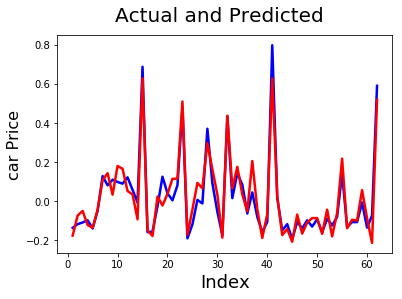

In [473]:
# Actual vs Predicted
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")     #Plotting Actual
plt.plot(c,y_pred_m43, color="red",  linewidth=2.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('car Price', fontsize=16)                       # Y-label

Text(0,0.5,'y_pred')

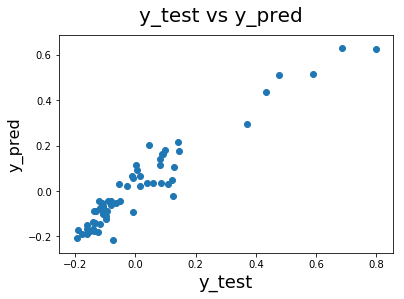

In [474]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_m43)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Text(0,0.5,'ytest-ypred')

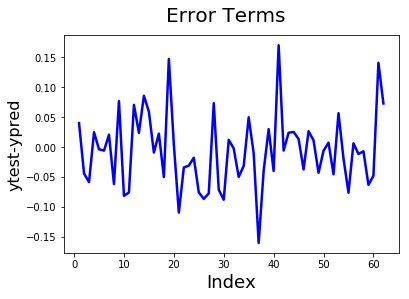

In [475]:
# Error terms
fig = plt.figure()
c = [i for i in range(1,63,1)]
plt.plot(c,y_test-y_pred_m43, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

Text(0,0.5,'Index')

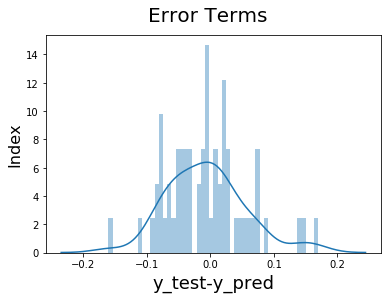

In [476]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_test-y_pred_m43),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label

In [477]:
# calculating root mean squared error
import numpy as np
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred_m43)))

RMSE : 0.061902552637395934


As the RMSE value is very less that is 0.06 the model created is valid and effective for use.